In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pycqed import *
from pycqed import physical_constants as pc

This notebook is used to verify the output of the package by comparing with known results in the literature. We start with basic circuits and move to more advanced circuits.

### Cooper Pair Box

### RF-SQUID

### C-shunt Flux Qubit

See: Gioele Consani and Paul A Warburton 2020 New J. Phys. 22 053040

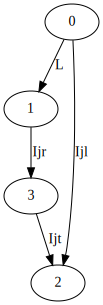

In [12]:
graph = CircuitGraph()
graph.addBranch(0, 1, "L")
graph.addBranch(0, 2, "Cjl")
graph.addBranch(0, 2, "Ijl")
graph.addBranch(2, 3, "Csh")
graph.addBranch(2, 3, "Cjt")
graph.addBranch(2, 3, "Ijt")
graph.addBranch(1, 3, "Cjr")
graph.addBranch(1, 3, "Ijr")
graph.drawGraphViz("SCGraph")

In [13]:
circuit = SymbolicSystem(graph)

In [14]:
circuit.coordinate_modes

{1: 'oscillator', 2: 'charge', 3: 'charge'}

In [15]:
circuit.circuit_params

{'L': L_{},
 'Cjl': C_{jl},
 'Ijl': I_{jl},
 'Cjr': C_{jr},
 'Ijr': I_{jr},
 'Csh': C_{sh},
 'Cjt': C_{jt},
 'Ijt': I_{jt}}

In [16]:
circuit.getCapacitanceMatrix()

Matrix([
[ C_{jr},                        0,                  -C_{jr}],
[      0, C_{jl} + C_{jt} + C_{sh},         -C_{jt} - C_{sh}],
[-C_{jr},         -C_{jt} - C_{sh}, C_{jr} + C_{jt} + C_{sh}]])

In [17]:
circuit.getInductanceMatrix()

Matrix([
[1.0*L_{}, 0, 0],
[       0, 0, 0],
[       0, 0, 0]])

In [18]:
circuit.getQuantumHamiltonian()

Matrix([[-0.5*I_{jl}*(1.0*D^{\dagger}_{2} + 1.0*D_{2}) - 0.5*I_{jr}*(1.0*D^{\dagger}_{1}*D_{3} + 1.0*D_{1}*D^{\dagger}_{3}) - 0.5*I_{jt}*(e^{i\phi_{32-2e}}*D_{3}*D^{\dagger}_{2} + conjugate(e^{i\phi_{32-2e}})*D^{\dagger}_{3}*D_{2}) + (0.5*Q_{1}/C_{jl} + 0.5*Q_{2}/C_{jl} + 0.5*Q_{3}/C_{jl})*Q_{2} + (0.5*(C_{jl} + C_{jt} + C_{sh})*Q_{1}/(C_{jl}*C_{jt} + C_{jl}*C_{sh}) + 0.5*(C_{jl} + C_{jt} + C_{sh})*Q_{3}/(C_{jl}*C_{jt} + C_{jl}*C_{sh}) + 0.5*Q_{2}/C_{jl})*Q_{3} + (0.5*(C_{jl}*C_{jr} + C_{jl}*C_{jt} + C_{jl}*C_{sh} + C_{jr}*C_{jt} + C_{jr}*C_{sh})*Q_{1}/(C_{jl}*C_{jr}*C_{jt} + C_{jl}*C_{jr}*C_{sh}) + 0.5*(C_{jl} + C_{jt} + C_{sh})*Q_{3}/(C_{jl}*C_{jt} + C_{jl}*C_{sh}) + 0.5*Q_{2}/C_{jl})*Q_{1} + 0.5*\Phi_{1}**2/L_{}]])

In [19]:
hamil = NumericalSystem(circuit)
hamil.configureOperator(1,4,"oscillator")
hamil.configureOperator(2,4,"charge")
hamil.configureOperator(3,4,"charge")

Using existing PyCQED tmp output root directory '/tmp/.pycqed/'.


In [20]:
hamil.getParameterNames()

['L', 'Cjl', 'Ijl', 'Cjr', 'Ijr', 'Csh', 'Cjt', 'Ijt', 'phi32-2e']

In [21]:
# Fabrication parameters
Cjt = 1.8 # fF
Ejt = 45.0 # GHz
Ic = 2*np.pi*pc.h*Ejt*1e9/pc.phi0*1e6 # uA
Csh = 50 # fF
L = 100.0 # pH
alpha = 0.43
hamil.setParameterValues(
    'Cjl', Cjt/alpha,
    'Cjt', Cjt,
    'Cjr', Cjt/alpha,
    'Ijl', Ic/alpha,
    'Ijt', Ic,
    'Ijr', Ic/alpha,
    'Csh', Csh,
    'L', L,
    'phi32-2e',0.5
)

In [23]:
hamil.addSweep('phi32-2e', 0.48, 0.52, 21)
sweep = hamil.paramSweep(timesweep=True)

Parameter Sweep Duration:
  Initialization:	0.175 s
  Loop duration:	1.558 s
  Avg iteration:	0.074 s


Text(0, 0.5, '$E_{g,i}$ (GHz)')

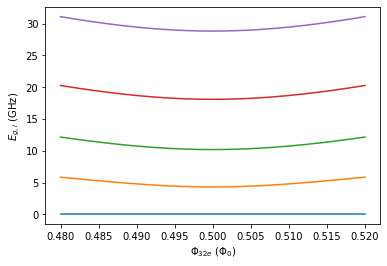

In [24]:
x,sweep,v = hamil.getSweep(sweep,'phi32-2e',{})
for i in range(5):
    y = sweep[i] - sweep[0]
    plt.plot(x,y)
plt.xlabel("$\\Phi_{32e}$ ($\\Phi_0$)")
plt.ylabel("$E_{g,i}$ (GHz)")

In [12]:
Lr = 1e3*1.2*1e-12
Cr = 400.0*1.2*1e-15
1/(2*np.pi*np.sqrt(Lr*Cr))*1e-9

6.631455962162306

In [13]:
np.sqrt(Lr/Cr)

49.99999999999999

In [14]:
Cr = 1/(2*np.pi*6e9*50.0)

In [15]:
Lr = 50.0/(2*np.pi*6e9)

In [16]:
1/(2*np.pi*np.sqrt(Lr*Cr))*1e-9

5.999999999999999